In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
from numpy import exp, log, sqrt, pi, maximum, max, abs
import matplotlib as mpl
from scipy.stats import norm
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'Arial' # 'Times New Roman' 

In [3]:
def d1(S0, K, r, q, σ, t):
    return ( log(S0/K) + (r - q + σ**2 / 2.0) * t  )/(σ * sqrt(t) )
def d2(S0, K, r, q, σ, t):
    return ( log(S0/K) + (r - q - σ**2 / 2.0) * t  )/(σ * sqrt(t) )
def N(x):
    return norm.cdf(x)
def BSC(S0, K, r, q, σ, t):
    return S0 * exp(-q*t) * N(d1(S0, K, r, q, σ, t)) - K * exp(-r*t) * N(d2(S0, K, r, q, σ, t))

In [4]:
def vega(S0, K, r, q, σ, t):
        return ( S0*exp(-q*t) * sqrt(t) * norm.pdf(d1(S0, K, r, q, σ, t)) )

In [5]:
def calIV(price, S0, K, r, q, t):
    S = S0 * exp(-q*t)
    X = K * exp(-r*t)

    a = price - 0.5 * (S - X)
    b = (S - X)**2 / pi
    c = maximum(a**2-b, 0)
    iv0 = sqrt(2*pi/t)/(S+X) * (a+sqrt(c))

    iv = iv0
    count = 0

    for count in range(100):
        iv0 = iv
        bsc = BSC(S0, K, r, q, iv0, t)
        iv = iv0 - (bsc - price)/vega(S0, K, r, q, iv0, t)
        diff = max(abs(bsc - price))
        if diff <= 1e-12:
            break
        
    return(iv)
    

In [6]:
import pandas as pd

In [7]:
rawData = pd.read_csv("iv_data.csv")
rawData.head()

,K,C
0,50,51.50
1,55,46.83
2,60,42.24
3,65,37.77
4,70,33.47


In [8]:
# data processing
S0 = 100
K = rawData.K
price = rawData.C
r = 0.05
q = 0.01
t = 1

In [9]:
# Calculate IV
iv = calIV(price, 100, K, 0.05, 0.01, 1.0)

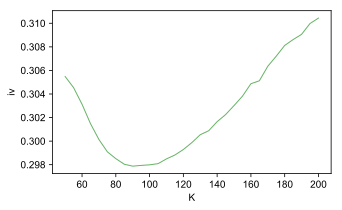

In [10]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot(K, iv, 'g', lw=1, alpha=0.6)
ax.set_xlabel('K')
ax.set_ylabel('iv')
plt.show()